In [6]:
import re
# if you don't have pandas, uncomment the next line
#!pip install pandas
import nltk
# if you don't have nltk, uncomment the next line
# nltk.download('stopwords')
import pandas as pd
from nltk.stem.isri import ISRIStemmer
import matplotlib.pyplot as plt
import seaborn as sns


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\osama\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


# Data Preprocessing


In [7]:
# Let's read the tweets text file
import pandas as pd
data = pd.read_csv("Dataset/train.csv")
data

,text,category,stance
0,بيل غيتس يتلقى لقاح #كوفيد19 من غير تصوير الاب...,celebrity,1
1,وزير الصحة لحد اليوم وتحديدا هلأ بمؤتمروا الصح...,info_news,1
2,قولكن رح يكونو اد المسؤولية ب لبنان لما يوصل ...,info_news,1
3,#تركيا.. وزير الصحة فخر الدين قوجة يتلقى أول ج...,celebrity,1
4,وئام وهاب يشتم الدول الخليجية في كل طلة اعلامي...,personal,0
...,...,...,...
6983,#الاتحاد_الدولي_لمكافحه_العدوي: يجب تطعيم 70% ...,info_news,1
6984,الوباء الاخطر على الكرة الأرضية ليس كورونا <LF...,others,0
6985,الجرعة الاولى من لقاح كورونا 👌 https://t.co/L2...,info_news,1
6986,بعد حظر #خامنئي اللقاحات الغربية.. #طهران بصدد...,info_news,1


## Clean each tweet

In [8]:
newList=[]
for i, produto in data.iterrows():
    # remove the Links
    newTweet=re.sub(r'http\S+', '', produto['text'])
    # remove english letters
    newTweet=re.sub(r'[a-zA-Z]', '', newTweet)
    # remove numbers
    newTweet=re.sub(r'[0-9]', '', newTweet)
    # remove the arabic numbers
    newTweet=re.sub(r'[\u0660-\u0669]', '', newTweet)
    # remove the emails
    newTweet=re.sub(r'\S*@\S*\s?', '', newTweet)
    # remove the hashtags
    newTweet=re.sub(r'#\S+', '', newTweet)
    # remove the mentions
    newTweet=re.sub(r'@\S+', '', newTweet)
    # remove emojis
    RE_EMOJI = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    newTweet=RE_EMOJI.sub(r'', newTweet)
    # replace _ by whitespace
    newTweet=re.sub(r'_', ' ', newTweet)
    
    # remove the punctuations
    newTweet = re.sub('\W+',' ', newTweet)

    # remove duplicated whitespaces
    newTweet=re.sub(r'\s+', ' ', newTweet)

    # applay tokenization
    newTweet=newTweet.split()

    # may not be necessary بتبوظ الكلام
    # apply stemming
    st = ISRIStemmer()
    #newTweet=[st.stem(word) for word in newTweet]
    
    # remove stopwords
    stopwords_arabic = nltk.corpus.stopwords.words('arabic')
    newTweet=[word for word in newTweet if word not in stopwords_arabic]
        
    newList.append(newTweet)
data['text']=newList
data.to_csv(f"Dataset/preprocessingData.csv", index=False)
    

## Data Visualisation and Exploration


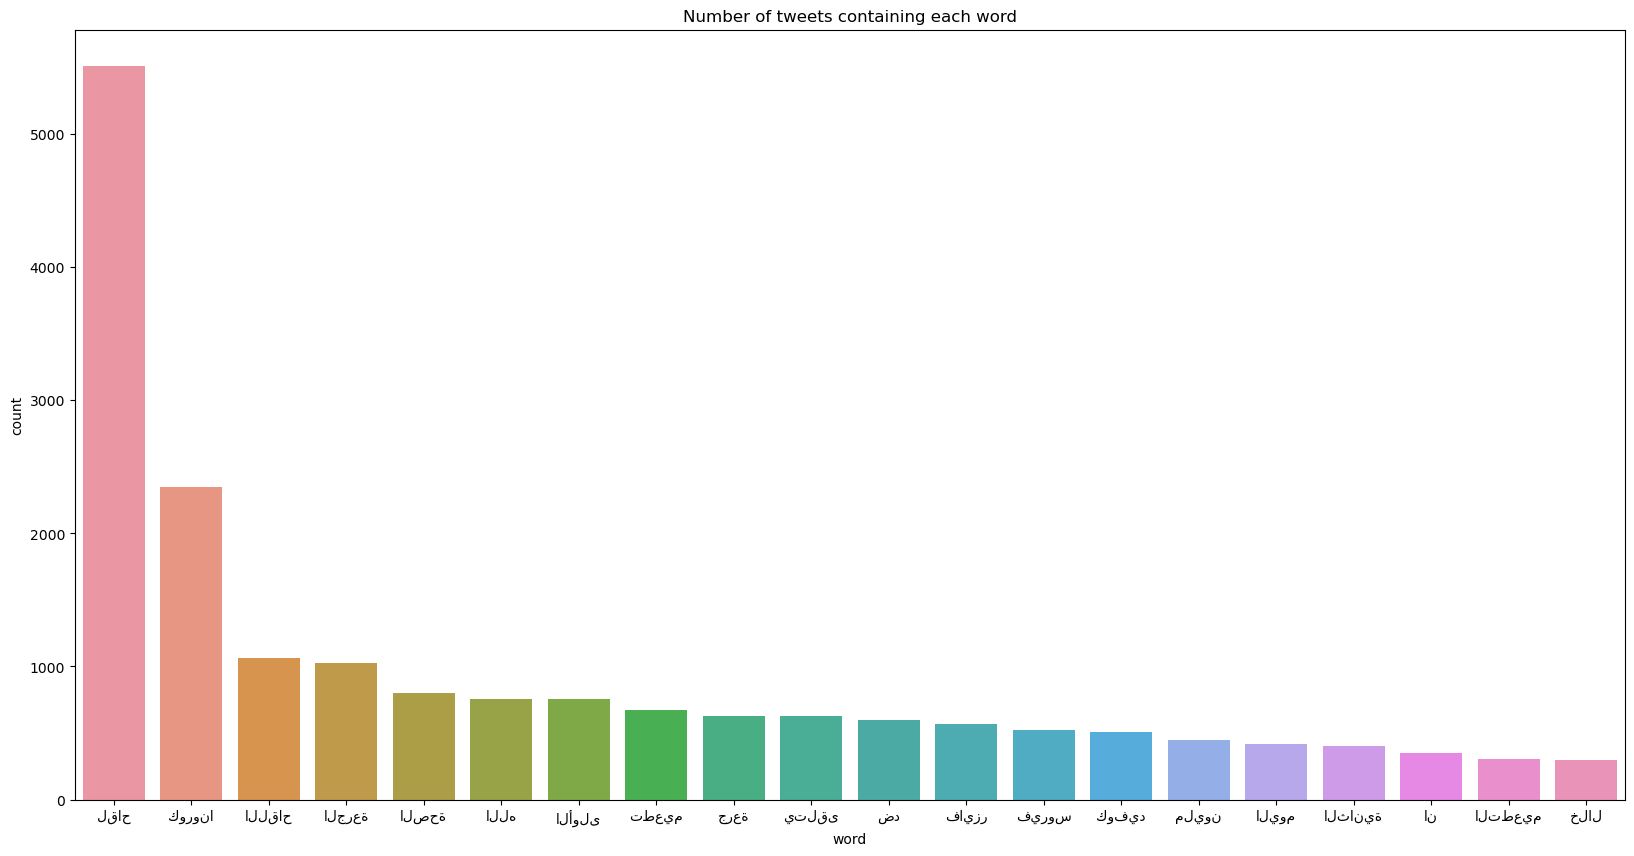

In [31]:
# We want to see how many tweets contain each word in the whole dataset without counting taking into account the tweets that contain the word more than once
# Take care that in data['text'] we have a list of lists
# We need to flatten the list of lists
# We will use the itertools library
import itertools
# flatten the list of lists
flat_list = list(itertools.chain.from_iterable(data['text']))
# create a dataframe
df = pd.DataFrame(flat_list, columns=['word'])
# count the words
df['count'] = df.groupby('word')['word'].transform('count')
# remove duplicates
# Why do we need to remove duplicates? Because we have a list of lists and we want to count the words in the whole list of lists not in each list separately
df = df.drop_duplicates()
# sort the dataframe by count
df = df.sort_values(by=['count'], ascending=False)
# reset the index
df = df.reset_index(drop=True)
# plot the dataframe
plt.figure(figsize=(20,10))
sns.barplot(x='word', y='count', data=df.head(20))
# This diagram shows how many tweets contain each word
# Print this as a title in the next diagram
plt.title('Number of tweets containing each word')
plt.show()

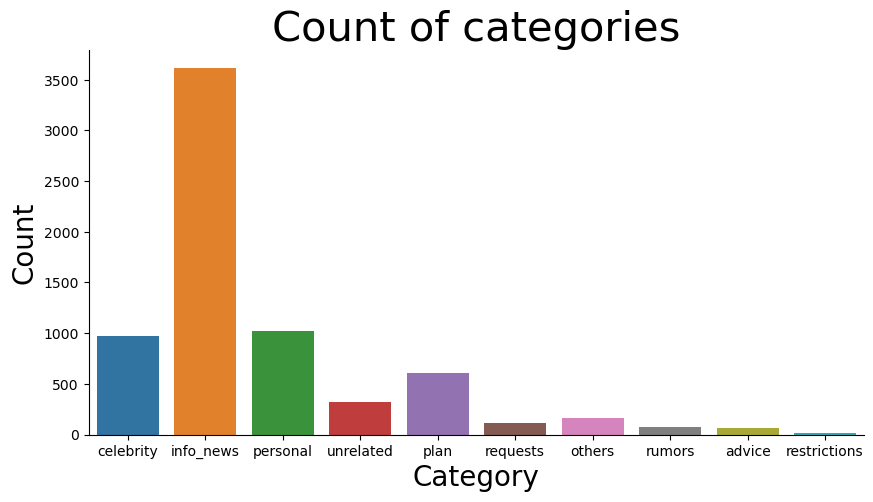

In [9]:
plt.figure(figsize=(10, 5))
plt.title('Count of categories', size=30)
sns.countplot(x=data.category)
plt.ylabel('Count', size=20)
plt.xlabel('Category', size=20)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

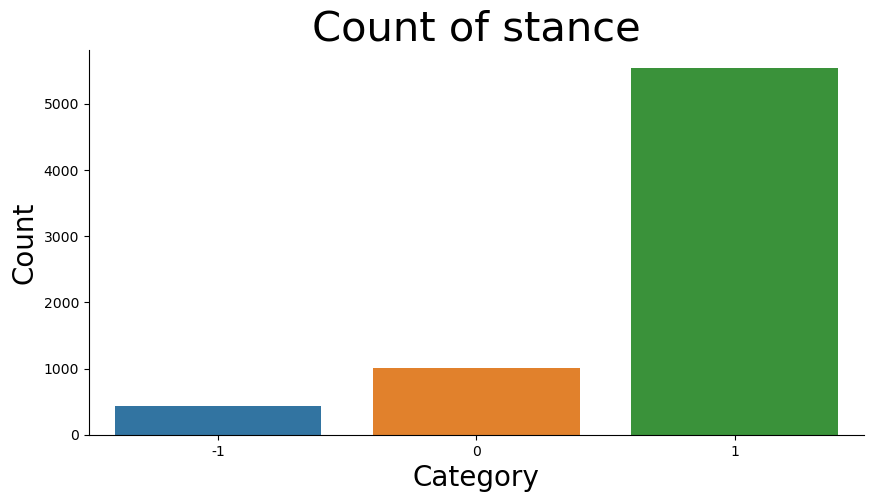

In [33]:
plt.figure(figsize=(10, 5))
plt.title('Count of stance', size=30)
sns.countplot(x=data.stance)
plt.ylabel('Count', size=20)
plt.xlabel('Category', size=20)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()


In [34]:
# Print the percentage of each category
print(data['category'].value_counts(normalize=True))
# Print the percentage of each stance
print(data['stance'].value_counts(normalize=True))

info_news       0.517459
personal        0.146680
celebrity       0.139525
plan            0.086720
unrelated       0.046222
others          0.023898
requests        0.016027
rumors          0.011305
advice          0.009588
restrictions    0.002576
Name: category, dtype: float64
 1    0.792501
 0    0.144820
-1    0.062679
Name: stance, dtype: float64


In [37]:
# Count the number of unique words in the whole dataset
# We will use the itertools library
import itertools
# flatten the list of lists
flat_list = list(itertools.chain.from_iterable(data['text']))
# create a dataframe
df = pd.DataFrame(flat_list, columns=['word'])
# count the words
df['count'] = df.groupby('word')['word'].transform('count')
# remove duplicates
# Why do we need to remove duplicates? Because we have a list of lists and we want to count the words in the whole list of lists not in each list separately
df = df.drop_duplicates()
# sort the dataframe by count
df = df.sort_values(by=['count'], ascending=False)
# reset the index
df = df.reset_index(drop=True)
# print the number of unique words
print(f'The number of unique words in the whole dataset is {df.shape[0]}')


The number of unique words in the whole dataset is 26887
